In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

## **A) Importação de dados**

In [4]:
open_file = '../../../Data/Processed/cenario3/dados_cenario3.csv'
dataframe = pd.read_csv(open_file, delimiter=';', parse_dates=['Data'], index_col=0,)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8807
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Longitude  8808 non-null   float64       
 1   Latitude   8808 non-null   float64       
 2   Data       8808 non-null   datetime64[ns]
 3   VentoC     8808 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 344.1 KB


## <span style="color:#C71585"> **B) Visualização Gráfica - Série Temporal**

Séries temporais são uma séries de observações registradas em intervalos regulares de tempo (cada dia, cada mês, cada ano, etc).
<p>

Normalmente, se usa o conceito de séries temporais para:
- Identificar a natureza do fenômeno representado pela sequência de observações para encontrar padrões de comportamentos; e<br>
- Usar modelos estatísticos para prever valores futuros, baseando-se em resultados do passado.


#### <span style="color:#4B0082"> **B.1) Vento Observado (m/s)**

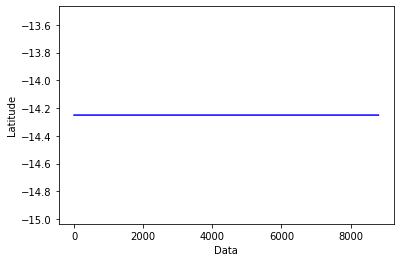

In [6]:
plt.xlabel('Data')
plt.ylabel('Latitude')
plt.plot(dataframe.index, dataframe.Latitude,color='blue')

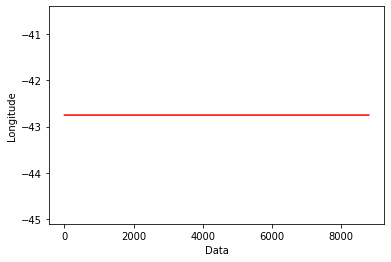

In [7]:
plt.xlabel('Data')
plt.ylabel('Longitude')
plt.plot(dataframe.index, dataframe.Longitude,color='red')

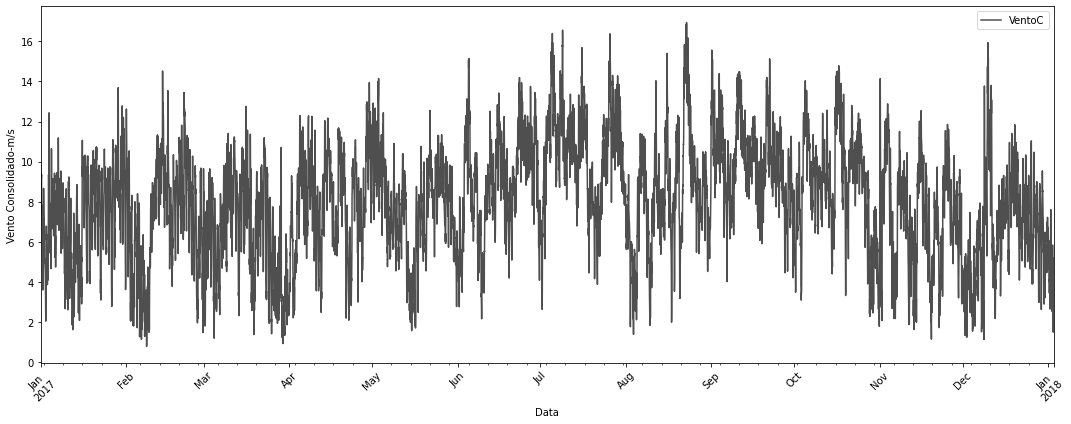

In [8]:
df_serietemporal_vento = dataframe.drop(['Longitude', 'Latitude'], axis=1)
df_serietemporal_vento = df_serietemporal_vento.set_index('Data')

df_serietemporal_vento.head()
df_serietemporal_vento.plot(figsize=(15,6),color='#4F4F4F')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Vento Consolidado-m/s')
plt.tight_layout()

## <span style="color:#C71585"> **C) Plotar Decomposição no Vento Verificado**

O objetivo é decompor o gráfico em 4(quatro) tipos. Os plots gerados pela biblioteca <i>statsmodels</i> foram:<br>
- Observação original
- Tendência
- Sazonalidade
- Residual
    

Antes mesmo de explorar um gráfico temporal, é necessário conhecer 2 componentes básicos das time series.<br>
<b>1.Tendência</b>:  É a direção geral de alguma coisa que está se desenvolvendo ou evoluindo no eixo do tempo.
<p>
<b>2.Sazonalidade</b>: É qualquer mudança ou padrão previsível em uma série temporal. Essa oscilação pode ser recorrente ou se repetir ao longo de um determinado período de tempo. Dependendo o ruído nos dados obtidos, também é facilmente detectada em gráficos.

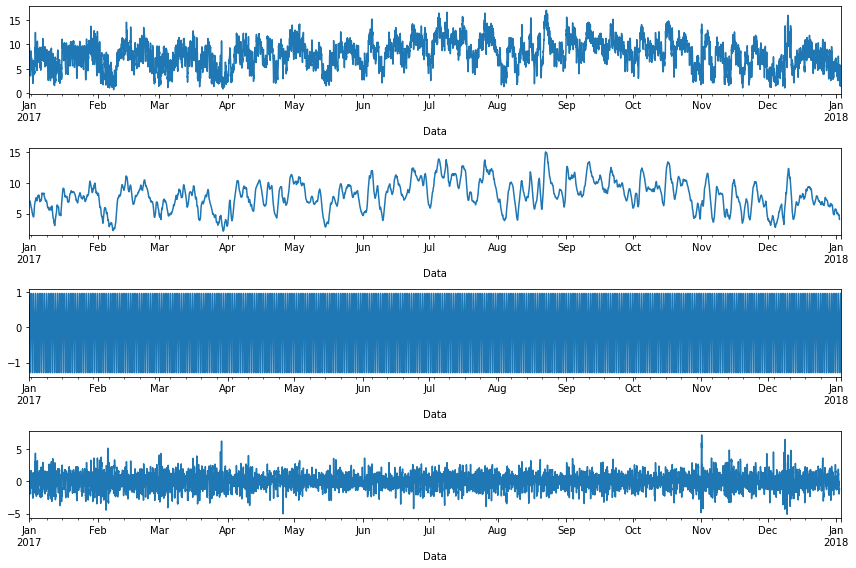

In [9]:
# from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_serietemporal_vento)
 
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,8))

# 1. Grafico Original
result.observed.plot(ax=ax1)

# 2. Grafico Tendência # A tendencia é definida como um padrão de crescimento/descrecimento da variável em um certo período de tempo
result.trend.plot(ax=ax2) 

# 3. Grafico Sazonalidade # O componente sazonal pode ser definida como padrões de comportamento que se repetem em específicas épocas do ano
result.seasonal.plot(ax=ax3)

# 2. Grafico Ruído (Dados que não puderam ser explicados matematicamente, exibe comportamentos aleatórios gerados por choques sobre a série)
result.resid.plot(ax=ax4)

plt.tight_layout()


### <span style="color:#4B0082"> **Análise da Decomposição**

Baseado no gráfico de sazonalidade, podemos afirmar que é uma <b>Série NÃO Estacionária.</b><br>
Uma série estacionária tem média constante durante o tempo, não existe tendências de alta ou de baixa. A razão disso é que tendo uma média constante com variações ao redor desta média fica muito mais fácil de extrapolar ao futuro. Uma série não estacionária é uma cujas propriedades estatísticas mudam com o tempo.

## <span style="color:#C71585"> **D) Séries Não Estacionárias**

In [10]:
#importando bibliotecas essenciais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### <span style="color:#4B0082">**D1. Média Constante**

Uma série estacionária tem média constante durante o tempo, não existe tendências de alta ou de baixa. Há casos que a variância é pequena em relação à média e usá-la pode ser uma boa métrica para fazer previsões para o futuro.<p>

<b>Caso a série não seja estacionária</b> a previsão para o futuro não será eficiente, pois as variações de valores ao redor da média se afastam significativamente

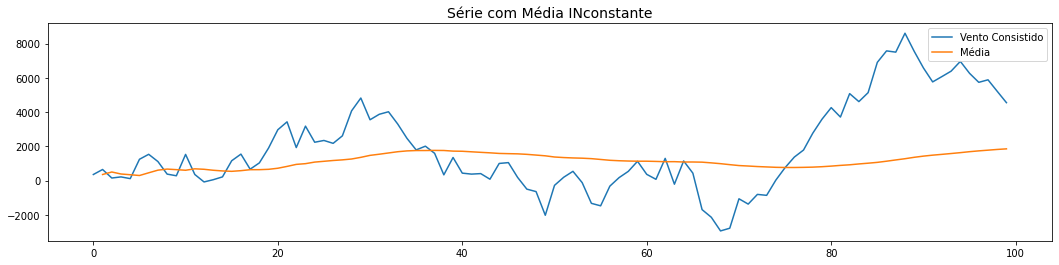

In [11]:
#Criando uma média que se expande do primeiro valor e acumulado até cada dia anterior
rand = dataframe['VentoC'].to_numpy()
                           
rand2 = np.cumsum([x for x in len(rand) * np.random.randn(100) * 0.1])

#Criando uma média que se expande do primeiro valor e acumulado até cada dia anterior
mean2 = [np.mean(rand2[:x]) for x in range(len(rand2))]
plt.figure(figsize=(18,4))
plt.plot(rand2, label='Vento Consistido')
plt.plot(mean2, label='Média')
plt.title('Série com Média INconstante', fontdict={'fontsize':14})
plt.legend()
plt.show()



<b>No gráfico acima, eixo X representando os 8760 eventos, claramente nota-se uma tendência de alta gradativa a média subindo, neste caso se a média fosse usada para fazer previsões futuras o erro ia ser significante, pois a magnitude do ventos previstos estariam sempre abaixo do preço real.</b>

#### <span style="color:#4B0082">**D.2. Variância Constante**

Quando a série tem variância constante, temos ideia da variação padrão em relação à média, quando a variância não é constante (como imagem abaixo) a previsão provavelmente vai ter erros maiores em determinados períodos e estes períodos não serão previsíveis, pois nestes casos espera-se que a variância permaneça inconstante durante o tempo, inclusive no futuro.<p>

Para diminuir o efeito da variância, pode-se aplicar a transformação logarítmica, transformação de escalas exponenciais como o método Box-Cox ou deflacionar a série, caso faça sentido

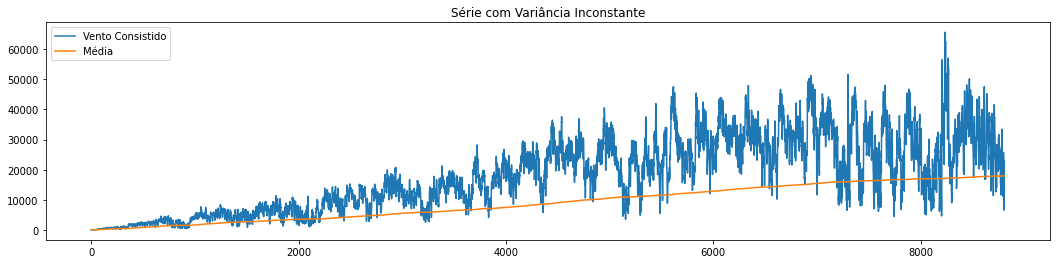

In [12]:
rand = dataframe['VentoC'].to_numpy()

rand3 = [x for x in range(len(rand)) * rand * 0.5]

#Criando uma média que se expande do primeiro valor e acumulado até cada dia anterior
mean3 = [np.mean(rand3[:x]) for x in range(len(rand3))]
plt.figure(figsize=(18,4))
plt.plot(rand3, label='Vento Consistido')
plt.plot(mean3, label='Média')
plt.title('Série com Variância Inconstante')
plt.legend()
plt.show()

## #############################################